In [2]:
import os, sys, shutil

In [3]:
# get generic path to directory
dir_path = os.path.dirname(os.path.realpath("__file__"))

original_dataset_dir = os.path.join(dir_path, 'train')
base_dir = os.path.join(dir_path, 'NewTrain')

shutil.rmtree(base_dir, ignore_errors=True)
os.mkdir(base_dir) 
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir) 
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir) 
test_dir = os.path.join(base_dir, 'test') 
os.mkdir(test_dir) 

train_cats_dir = os.path.join(train_dir, 'leaks')
os.mkdir(train_cats_dir) 

train_dogs_dir = os.path.join(train_dir, 'nonleaks') 
os.mkdir(train_dogs_dir) 


validation_cats_dir = os.path.join(validation_dir, 'leaks') 
os.mkdir(validation_cats_dir) 
validation_dogs_dir = os.path.join(validation_dir, 'nonleaks') 
os.mkdir(validation_dogs_dir) 

test_cats_dir = os.path.join(test_dir, 'leaks') 
os.mkdir(test_cats_dir) 
test_dogs_dir = os.path.join(test_dir, 'nonleaks') 
os.mkdir(test_dogs_dir) 

In [4]:
fnames = ['leak.frame{}.jpg'.format(i) for i in range(1476, 1487)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(train_cats_dir, fname) 
    shutil.copyfile(src, dst) 

fnames = ['leak.frame{}.jpg'.format(i) for i in range(1489, 1491)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(validation_cats_dir, fname) 
    shutil.copyfile(src, dst) 

fnames = ['leak.frame{}.jpg'.format(i) for i in range(1491, 1494)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname) 
    shutil.copyfile(src, dst) 


fnames = ['nonleak.frame{}.jpg'.format(i) for i in range(1, 10)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(train_dogs_dir, fname) 
    shutil.copyfile(src, dst) 

fnames = ['nonleak.frame{}.jpg'.format(i) for i in range(10, 14)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(validation_dogs_dir, fname) 
    shutil.copyfile(src, dst) 

fnames = ['nonleak.frame{}.jpg'.format(i) for i in range(14, 18)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname) 
    shutil.copyfile(src, dst) 

In [1]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 1.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -r ../requirements.txt

Ignoring tensorflow: markers 'sys_platform == "linux"' don't match your environment
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
ERROR: Could not find a version that satisfies the requirement tensorflow-macos>=2.0.0 (from versions: none)
ERROR: No matching distribution found for tensorflow-macos>=2.0.0
Note: you may need to restart the kernel to use updated packages.


In [12]:
from keras import layers 
from keras import models 

model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten()) 
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [13]:
from keras import optimizers 

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

/Users/royhuang/Documents/coding/Squishy-Methane-Analysis/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1. / 255,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.1,
)
test_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1. / 255,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.1,
) 

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    batch_size=40, 
    class_mode='binary' 
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150, 150), 
    batch_size=40, 
    class_mode='binary'
)

Found 20 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [17]:

history = model.fit_generator(
    train_generator, 
    steps_per_epoch=1, 
    epochs=500, 
    validation_data=validation_generator, 
    validation_steps=1
)


model.save('leak_and_nonleak_1.h5')

Epoch 1/500


/var/folders/0z/b4wxymw136bgfx2h57cr9nbh0000gn/T/ipykernel_86885/4048508954.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


1/1 [==============================] - 0s 287ms/step - loss: 0.6456 - acc: 0.5500 - val_loss: 0.7452 - val_acc: 0.3333
Epoch 2/500
1/1 [==============================] - 0s 211ms/step - loss: 0.6866 - acc: 0.5500 - val_loss: 0.7114 - val_acc: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 206ms/step - loss: 0.7261 - acc: 0.5000 - val_loss: 0.6724 - val_acc: 0.3333
Epoch 4/500
1/1 [==============================] - 0s 215ms/step - loss: 0.6741 - acc: 0.6000 - val_loss: 0.7324 - val_acc: 0.1667
Epoch 5/500
1/1 [==============================] - 0s 223ms/step - loss: 0.6534 - acc: 0.7000 - val_loss: 0.7248 - val_acc: 0.3333
Epoch 6/500
1/1 [==============================] - 0s 208ms/step - loss: 0.7300 - acc: 0.5500 - val_loss: 0.7012 - val_acc: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 217ms/step - loss: 0.6599 - acc: 0.5500 - val_loss: 0.7272 - val_acc: 0.3333
Epoch 8/500
1/1 [==============================] - 0s 213ms/step - loss: 0.6649 - acc: 0.7500 -

1/1 [==============================] - 0s 217ms/step - loss: 0.6560 - acc: 0.7000 - val_loss: 0.7147 - val_acc: 0.3333
Epoch 64/500
1/1 [==============================] - 0s 239ms/step - loss: 0.6916 - acc: 0.5500 - val_loss: 0.6341 - val_acc: 0.6667
Epoch 65/500
1/1 [==============================] - 0s 210ms/step - loss: 0.6419 - acc: 0.6500 - val_loss: 0.6588 - val_acc: 0.8333
Epoch 66/500
1/1 [==============================] - 0s 214ms/step - loss: 0.6609 - acc: 0.6000 - val_loss: 0.7782 - val_acc: 0.3333
Epoch 67/500
1/1 [==============================] - 0s 212ms/step - loss: 0.6454 - acc: 0.5500 - val_loss: 0.5514 - val_acc: 1.0000
Epoch 68/500
1/1 [==============================] - 0s 215ms/step - loss: 0.6901 - acc: 0.5000 - val_loss: 0.6948 - val_acc: 0.5000
Epoch 69/500
1/1 [==============================] - 1s 707ms/step - loss: 0.6358 - acc: 0.7500 - val_loss: 0.7986 - val_acc: 0.5000
Epoch 70/500
1/1 [==============================] - 1s 736ms/step - loss: 0.7225 - acc: 0

Epoch 125/500
1/1 [==============================] - 0s 206ms/step - loss: 0.6236 - acc: 0.7500 - val_loss: 1.0431 - val_acc: 0.3333
Epoch 126/500
1/1 [==============================] - 0s 205ms/step - loss: 0.7357 - acc: 0.6000 - val_loss: 0.7107 - val_acc: 0.3333
Epoch 127/500
1/1 [==============================] - 0s 206ms/step - loss: 0.6420 - acc: 0.5500 - val_loss: 0.7488 - val_acc: 0.5000
Epoch 128/500
1/1 [==============================] - 0s 205ms/step - loss: 0.6994 - acc: 0.6000 - val_loss: 0.7156 - val_acc: 0.3333
Epoch 129/500
1/1 [==============================] - 0s 208ms/step - loss: 0.7012 - acc: 0.4000 - val_loss: 0.7456 - val_acc: 0.5000
Epoch 130/500
1/1 [==============================] - 0s 212ms/step - loss: 0.6581 - acc: 0.6500 - val_loss: 0.7805 - val_acc: 0.5000
Epoch 131/500
1/1 [==============================] - 0s 206ms/step - loss: 0.6383 - acc: 0.6000 - val_loss: 0.7246 - val_acc: 0.6667
Epoch 132/500
1/1 [==============================] - 0s 215ms/step - 

1/1 [==============================] - 0s 210ms/step - loss: 0.5936 - acc: 0.7500 - val_loss: 0.6215 - val_acc: 0.5000
Epoch 187/500
1/1 [==============================] - 0s 214ms/step - loss: 0.6916 - acc: 0.5000 - val_loss: 0.6890 - val_acc: 0.5000
Epoch 188/500
1/1 [==============================] - 0s 209ms/step - loss: 0.6459 - acc: 0.5500 - val_loss: 0.7782 - val_acc: 0.3333
Epoch 189/500
1/1 [==============================] - 0s 224ms/step - loss: 0.6289 - acc: 0.6000 - val_loss: 0.6551 - val_acc: 0.8333
Epoch 190/500
1/1 [==============================] - 0s 211ms/step - loss: 0.6875 - acc: 0.7000 - val_loss: 0.5512 - val_acc: 0.6667
Epoch 191/500
1/1 [==============================] - 0s 211ms/step - loss: 0.6765 - acc: 0.5500 - val_loss: 0.7020 - val_acc: 0.5000
Epoch 192/500
1/1 [==============================] - 0s 220ms/step - loss: 0.6091 - acc: 0.6000 - val_loss: 0.5823 - val_acc: 0.6667
Epoch 193/500
1/1 [==============================] - 0s 231ms/step - loss: 0.6763 -

Epoch 248/500
1/1 [==============================] - 0s 205ms/step - loss: 0.6877 - acc: 0.5500 - val_loss: 0.5958 - val_acc: 0.6667
Epoch 249/500
1/1 [==============================] - 0s 212ms/step - loss: 0.6911 - acc: 0.5500 - val_loss: 1.0016 - val_acc: 0.3333
Epoch 250/500
1/1 [==============================] - 0s 225ms/step - loss: 0.6897 - acc: 0.6000 - val_loss: 0.7219 - val_acc: 0.3333
Epoch 251/500
1/1 [==============================] - 0s 216ms/step - loss: 0.6113 - acc: 0.7500 - val_loss: 0.6414 - val_acc: 0.6667
Epoch 252/500
1/1 [==============================] - 0s 207ms/step - loss: 0.6217 - acc: 0.6500 - val_loss: 0.5927 - val_acc: 0.6667
Epoch 253/500
1/1 [==============================] - 0s 207ms/step - loss: 0.6156 - acc: 0.6500 - val_loss: 0.7531 - val_acc: 0.5000
Epoch 254/500
1/1 [==============================] - 0s 205ms/step - loss: 0.6011 - acc: 0.6000 - val_loss: 0.6547 - val_acc: 0.3333
Epoch 255/500
1/1 [==============================] - 0s 202ms/step - 

1/1 [==============================] - 0s 230ms/step - loss: 0.6235 - acc: 0.7000 - val_loss: 1.0354 - val_acc: 0.3333
Epoch 310/500
1/1 [==============================] - 0s 293ms/step - loss: 0.6415 - acc: 0.6000 - val_loss: 0.4148 - val_acc: 1.0000
Epoch 311/500
1/1 [==============================] - 0s 244ms/step - loss: 0.6191 - acc: 0.6000 - val_loss: 0.6014 - val_acc: 0.6667
Epoch 312/500
1/1 [==============================] - 0s 244ms/step - loss: 0.6487 - acc: 0.7000 - val_loss: 0.5861 - val_acc: 0.8333
Epoch 313/500
1/1 [==============================] - 0s 238ms/step - loss: 0.5449 - acc: 0.8500 - val_loss: 0.6175 - val_acc: 0.8333
Epoch 314/500
1/1 [==============================] - 0s 213ms/step - loss: 0.5830 - acc: 0.7000 - val_loss: 0.8874 - val_acc: 0.3333
Epoch 315/500
1/1 [==============================] - 0s 223ms/step - loss: 0.6167 - acc: 0.6500 - val_loss: 0.9342 - val_acc: 0.6667
Epoch 316/500
1/1 [==============================] - 0s 220ms/step - loss: 0.7749 -

Epoch 371/500
1/1 [==============================] - 0s 223ms/step - loss: 0.6346 - acc: 0.6000 - val_loss: 0.6028 - val_acc: 1.0000
Epoch 372/500
1/1 [==============================] - 0s 257ms/step - loss: 0.6038 - acc: 0.6500 - val_loss: 0.6302 - val_acc: 0.6667
Epoch 373/500
1/1 [==============================] - 0s 297ms/step - loss: 0.6104 - acc: 0.6500 - val_loss: 0.5055 - val_acc: 1.0000
Epoch 374/500
1/1 [==============================] - 0s 270ms/step - loss: 0.6583 - acc: 0.7500 - val_loss: 0.5456 - val_acc: 0.8333
Epoch 375/500
1/1 [==============================] - 0s 242ms/step - loss: 0.6042 - acc: 0.7500 - val_loss: 0.9590 - val_acc: 0.5000
Epoch 376/500
1/1 [==============================] - 0s 227ms/step - loss: 0.6675 - acc: 0.6500 - val_loss: 0.4624 - val_acc: 0.8333
Epoch 377/500
1/1 [==============================] - 0s 214ms/step - loss: 0.6723 - acc: 0.5500 - val_loss: 0.4907 - val_acc: 0.8333
Epoch 378/500
1/1 [==============================] - 0s 220ms/step - 

1/1 [==============================] - 0s 202ms/step - loss: 0.6405 - acc: 0.5500 - val_loss: 0.7075 - val_acc: 0.6667
Epoch 433/500
1/1 [==============================] - 0s 201ms/step - loss: 0.5797 - acc: 0.8000 - val_loss: 0.5685 - val_acc: 0.6667
Epoch 434/500
1/1 [==============================] - 0s 201ms/step - loss: 0.5297 - acc: 0.7500 - val_loss: 0.8258 - val_acc: 0.3333
Epoch 435/500
1/1 [==============================] - 0s 206ms/step - loss: 0.5536 - acc: 0.8000 - val_loss: 0.5663 - val_acc: 0.6667
Epoch 436/500
1/1 [==============================] - 0s 209ms/step - loss: 0.5655 - acc: 0.7000 - val_loss: 0.6408 - val_acc: 0.6667
Epoch 437/500
1/1 [==============================] - 0s 205ms/step - loss: 0.5314 - acc: 0.7000 - val_loss: 0.6064 - val_acc: 0.6667
Epoch 438/500
1/1 [==============================] - 0s 213ms/step - loss: 0.5689 - acc: 0.7500 - val_loss: 0.7444 - val_acc: 0.3333
Epoch 439/500
1/1 [==============================] - 0s 208ms/step - loss: 0.6881 -

Epoch 494/500
1/1 [==============================] - 0s 209ms/step - loss: 0.6193 - acc: 0.5500 - val_loss: 0.7422 - val_acc: 0.3333
Epoch 495/500
1/1 [==============================] - 0s 214ms/step - loss: 0.6232 - acc: 0.5500 - val_loss: 0.5894 - val_acc: 0.6667
Epoch 496/500
1/1 [==============================] - 0s 215ms/step - loss: 0.5172 - acc: 0.7500 - val_loss: 0.4938 - val_acc: 0.8333
Epoch 497/500
1/1 [==============================] - 0s 221ms/step - loss: 0.4560 - acc: 0.9000 - val_loss: 0.5136 - val_acc: 0.8333
Epoch 498/500
1/1 [==============================] - 0s 213ms/step - loss: 0.5888 - acc: 0.6000 - val_loss: 0.4669 - val_acc: 0.6667
Epoch 499/500
1/1 [==============================] - 0s 228ms/step - loss: 0.6141 - acc: 0.5500 - val_loss: 0.7592 - val_acc: 0.5000
Epoch 500/500
1/1 [==============================] - 0s 213ms/step - loss: 0.5995 - acc: 0.7000 - val_loss: 0.5623 - val_acc: 0.8333


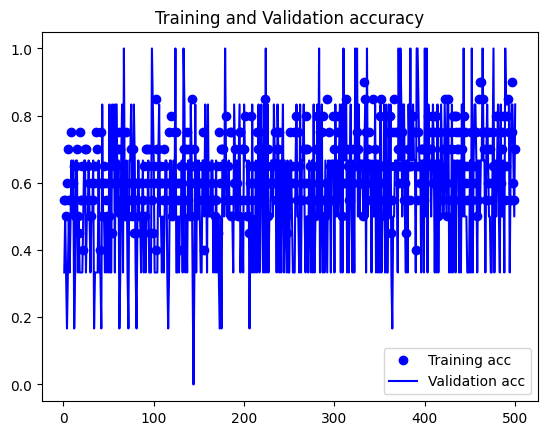

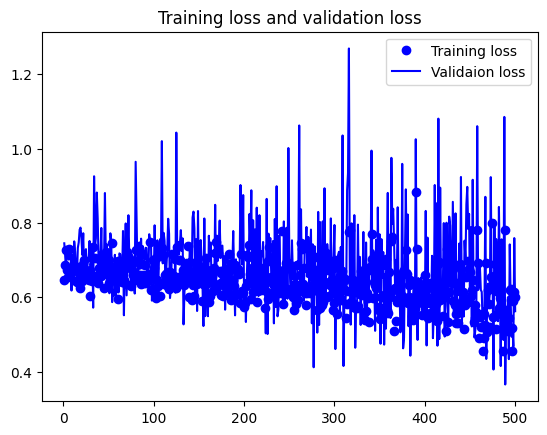

In [18]:
import matplotlib.pyplot as plt 

acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 

epochs = range(1, len(acc) + 1) 

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and Validation accuracy') 
plt.legend() 

plt.figure() 

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validaion loss') 
plt.title('Training loss and validation loss') 
plt.legend() 

plt.show() 

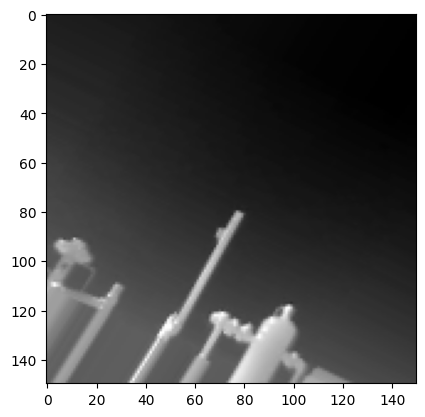

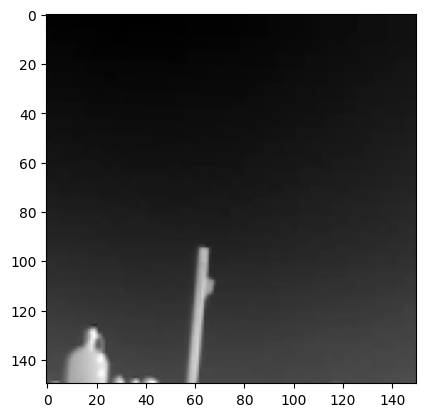

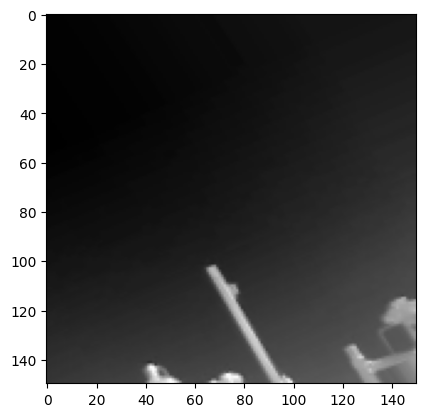

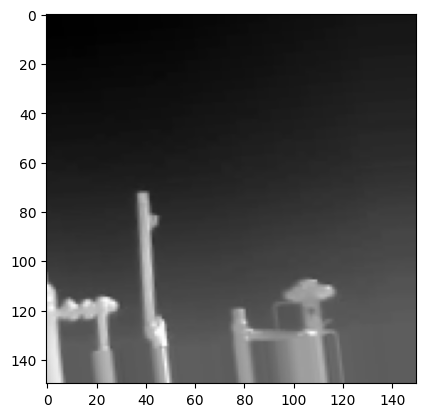

In [15]:
datagen = ImageDataGenerator(
    rotation_range=40,       #
    width_shift_range=0.2,   # 
    height_shift_range=0.2,  # 
    shear_range=0.2,         # 
    zoom_range=0.2,          # 
    horizontal_flip=True,    # 
    fill_mode='nearest'      # 
)

# 
from keras.preprocessing import image 
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]  # 
img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img)  # 
x = x.reshape((1, ) + x.shape)  # 

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i) 
    i += 1
    imgplot = plt.imshow(array_to_img(batch[0])) 
    if i % 4 == 0:
        break 
plt.show() 

In [58]:
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten()) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [59]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255) 
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='binary'
)

history = model.fit_generator(  
    
    train_generator, 
    steps_per_epoch=1, 
    epochs=30, 
    validation_data=validation_generator, 
    validation_steps=1
)

# Save
model.save('leak_and_nonleak_2.h5') 

Found 15 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Epoch 1/30


<ipython-input-59-5f1f3b26d16d>:26: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


1/1 [==============================] - 2s 2s/step - loss: 0.7024 - acc: 0.2667 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 2/30
1/1 [==============================] - 1s 531ms/step - loss: 0.6718 - acc: 0.7333 - val_loss: 0.7002 - val_acc: 0.5000
Epoch 3/30
1/1 [==============================] - 0s 492ms/step - loss: 0.6508 - acc: 0.7333 - val_loss: 0.7166 - val_acc: 0.5000
Epoch 4/30
1/1 [==============================] - 0s 487ms/step - loss: 0.6202 - acc: 0.7333 - val_loss: 0.7427 - val_acc: 0.5000
Epoch 5/30
1/1 [==============================] - 0s 459ms/step - loss: 0.6070 - acc: 0.7333 - val_loss: 0.7671 - val_acc: 0.5000
Epoch 6/30
1/1 [==============================] - 0s 452ms/step - loss: 0.6102 - acc: 0.7333 - val_loss: 0.7649 - val_acc: 0.5000
Epoch 7/30
1/1 [==============================] - 0s 453ms/step - loss: 0.5753 - acc: 0.7333 - val_loss: 0.7929 - val_acc: 0.5000
Epoch 8/30
1/1 [==============================] - 0s 457ms/step - loss: 0.6494 - acc: 0.7333 - val_loss:

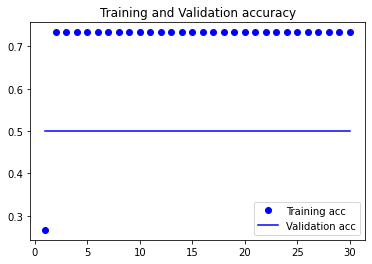

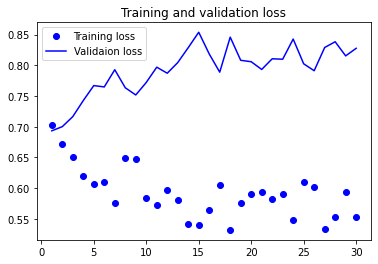

In [60]:
import matplotlib.pyplot as plt 

acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 

epochs = range(1, len(acc) + 1) 

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and Validation accuracy') 
plt.legend() 

plt.figure() 

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validaion loss') 
plt.title('Training and validation loss') 
plt.legend() 

plt.show() 

In [63]:
f1 = r'/Users/ianchen/Desktop/MethaneCNN/test/frame3018.jpg'  # nonleak
f2 = r'/Users/ianchen/Desktop/MethaneCNN/test/frame4414.jpg'  # leak

from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img

img_path = f2
img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img)  # 
x = x.astype('float32') / 255
x = x.reshape((1, ) + x.shape)  # 

res = model.predict(x)  # 
leak_acc = 1 - res[0][0]
leak_acc

1/1 [==============================] - 0s 30ms/step


0.764123409986496

1/1 [==============================] - 0s 101ms/step


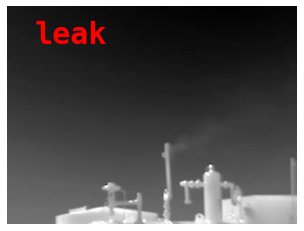

In [64]:
import matplotlib.pyplot as plt 
from keras.preprocessing import image 
from keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img

model = load_model('./leak_and_nonleak_2.h5')
image_path = r'./test/frame4404.jpg'  # 
original_image = load_img(image_path)

img = load_img(image_path, target_size=(150, 150))
x = img_to_array(img) 
x = x.astype('float32') / 255 
x = x.reshape((1, ) + x.shape) 

res = model.predict(x)
res = res[0][0]
acc = 1- res

text = 'leak'
if res > 0.5:
    text = 'nonleak'
plt.imshow(original_image)
plt.axis("off")
plt.text(30, 40, text, fontdict=dict(fontsize=30, color='r',
            family='monospace',#
            weight='bold',#
            )#
)
plt.show()

In [65]:
acc

0.7616920471191406